# Gradient descent

## Simulate 

$$X\sim U(0,1)$$

$$y = 2 + 9X + \epsilon$$

(1000, 1) (1000, 1)


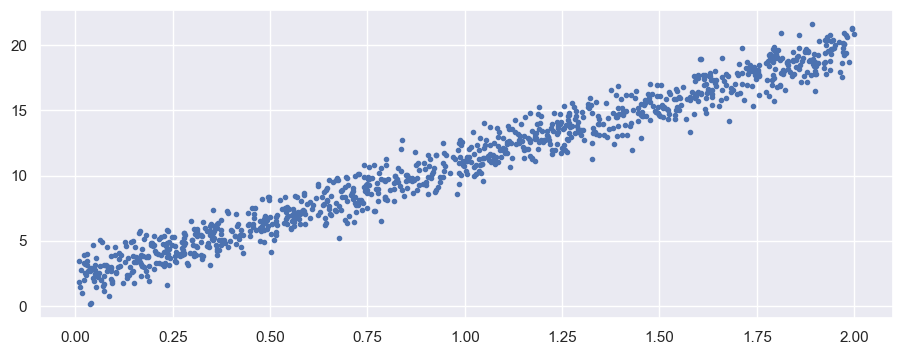

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
samples = 1000

X = 2*np.random.rand(samples,1)
epsilon = np.random.normal(0,1, size=(samples,1))

print(X.shape, epsilon.shape)

y = 2+9*X+epsilon

# Plot the data
plt.plot(X,y,'.')

In [76]:
X = np.c_[np.ones((samples)),X]
X[:5], X.shape

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

## Train|test split

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # adds up to 1000


((670, 2), (330, 2), (670, 1), (330, 1))

## Batch gradient descent

In [78]:
def gradient_descent(X, y, learning_rate = 0.1, epochs = 100):
    m = len(X)
    theta = np.random.randn(X.shape[1],1) # [beta_0, beta_1]^T

    for _ in range(epochs):
        gradients = 2/m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradients # learning_rate is eta in theory
    return theta

theta = gradient_descent(X_train, y_train, epochs=1000)
theta.reshape(-1) # throws away the extra dimension
#theta should converge to [2,9]. 
# proving theta converges to [2,9] is a bit more complicated

array([2.20500716, 8.90206121])

In [79]:
steps = range(1,200,1)
thetas = [gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in steps]
# We use reshape(-1) to convert the 2x1 array to a 2-element array


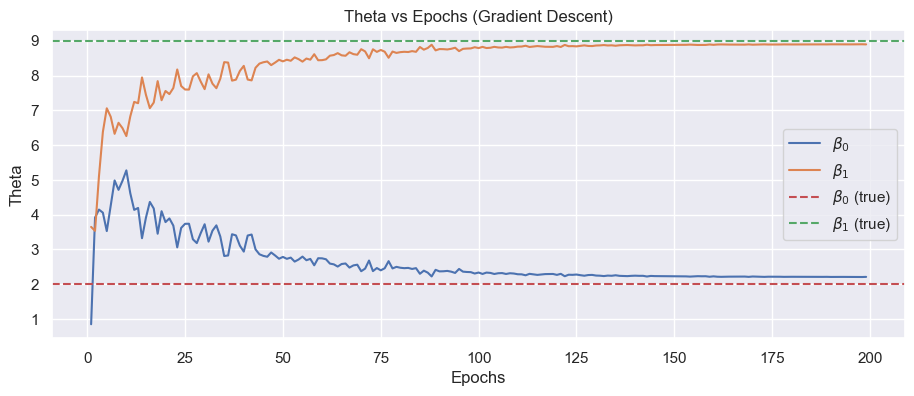

In [80]:
fig, ax = plt.figure(), plt.axes() # create a figure and axes
ax.plot(steps, thetas, label=[r"$\beta_0$", r"$\beta_1$"]) # plot thetas
ax.axhline(2, color='r', linestyle='--', label=r"$\beta_0$ (true)") # true value of beta_0
ax.axhline(9, color='g', linestyle='--', label=r"$\beta_1$ (true)") # true value of beta_1

ax.set(xlabel='Epochs', ylabel='Theta', title='Theta vs Epochs (Gradient Descent)') # set the labels and title

ax.legend() # show the legend
# From this plot, we can see that theta converges to [2,9] as the number of epochs increases

## Stochastic gradient descent (SGD)

In [81]:
np.random.seed(42)
epochs = 100 # number of epochs
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_rate_schedule(t):
    """Decays the learning rate as training progresses"""
    return t0 / (t + t1)
# This is the learning rate schedule. It is a function of the number of epochs
# We use this because we want the learning rate to be high at the beginning and decrease as training progresses
# So that we can converge to the minimum faster

theta = np.random.randn(2,1) # random initialization
m = len(X_train) # number of training samples

for epoch in range(epochs):
    for i in range(m): # for each training sample
        random_index = np.random.randint(m) # pick a random training sample
        x_i = X_train[random_index:random_index+1] # get the features of the random training sample
        y_i = y_train[random_index:random_index+1] # get the label of the random training sample
        
        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i) # calculate the gradients for the random training sample (1 sample) at one time
        eta = learning_rate_schedule(epochs*m+i) # get the learning rate for the current iteration
        theta -= eta * gradients # update theta using the learning rate and the gradients for the random training sample

theta
# theta should converge to [2,9]


array([[2.93910504],
       [8.27411427]])

In [82]:
# calculating y_pred
y_pred = X_test @ theta
MAE = np.mean(np.abs(y_pred - y_test))
MSE = np.mean((y_pred - y_test)**2)
RMSE = np.sqrt(MSE)

print(f"Mean Absolute Error: {MAE}\nMean Squared Error: {MSE}\nRoot Mean Squared Error: {RMSE}")

Mean Absolute Error: 0.8595889128223787
Mean Squared Error: 1.1352071387219411
Root Mean Squared Error: 1.065460998217176
